In [ ]:
#@title GitHub Token Ekle

import ipywidgets as widgets
from IPython.display import display
import os

def github_token_button_clicked(b):
    os.environ["GITHUB_TOKEN"] = "YOUR_GITHUB_TOKEN_HERE"
    print("GitHub Token ortam değişkenine eklendi!")

button1 = widgets.Button(
    description="GitHub Token Ekle",
    button_style='',
    tooltip='GitHub Token Ortam Değişkenine Ekle'
)
button1.on_click(github_token_button_clicked)
display(button1)

Button(description='GitHub Token Ekle', style=ButtonStyle(), tooltip='GitHub Token Ortam Değişkenine Ekle')

GitHub Token ortam değişkenine eklendi!


In [ ]:
#@title GitHub Token Ekle

import ipywidgets as widgets
import os
import datetime
from google.colab import drive
from IPython.display import display

def sync_drive_github(b):
    # Google Drive'ı bağla
    drive.mount('/content/drive', force_remount=True)

    # Git kullanıcı bilgilerini ayarla
    os.system('git config --global user.email "doganzub@gmail.com" > /dev/null 2>&1')
    os.system('git config --global user.name "doganzub" > /dev/null 2>&1')

    # GitHub Token kontrolü
    GITHUB_TOKEN = os.environ.get("GITHUB_TOKEN")
    if not GITHUB_TOKEN:
        print("❌ HATA: GitHub Token bulunamadı! Lütfen önce Buton 1 ile ayarlayın.")
        return

    # GitHub repo bağlantısı
    GITHUB_REPO = f"https://{GITHUB_TOKEN}@github.com/doganzub/ml.git"

    # Çalıştırılan notebook'un yolu ve adı (manuel düzenleyin)
    notebook_path = "/content/drive/MyDrive/Colab Notebooks/"
    running_notebook = "5_coklu_dogReg.ipynb"

    # Repo yoksa klonla
    if not os.path.exists("/content/ml"):
        os.system(f"cd /content && git clone {GITHUB_REPO}")

    # Git dizinine geç
    os.chdir("/content/ml")

    # Branch listesini al
    os.system("git fetch --all")
    existing_branches = os.popen("git branch -r").read()

    filename_parts = running_notebook.split("_")
    if not filename_parts[0].isdigit():
        print(f"🚫 {running_notebook} dosyasının başında rakam yok, işlem iptal edildi!")
    else:
        ders_no = filename_parts[0]
        branch_name = f"ders{ders_no}"

        if f"origin/{branch_name}" not in existing_branches:
            print(f"🚫 {branch_name} branch'i GitHub'da bulunamadı, işlem iptal edildi!")
        else:
            os.system(f"git checkout {branch_name}")
            os.system(f'cp "{notebook_path}{running_notebook}" "/content/ml/"')
            commit_message = f"{running_notebook} güncellendi - {datetime.datetime.now().strftime('%Y-%m-%d %H:%M')}"
            os.system("git add .")
            status = os.popen("git status --porcelain").read()

            if status.strip():
                os.system(f'git commit -m "{commit_message}"')
                os.system(f"git push origin {branch_name}")
                print(f"✅ {running_notebook} {branch_name} branch'ine yüklendi!")
            else:
                print(f"⚡ {running_notebook} için değişiklik yok, commit atlanıyor!")
            os.system(f'cp -f "/content/ml/{running_notebook}" "{notebook_path}"')

    print("🎯 GitHub ve Google Drive senkronize edildi!")

# Buton 2: Drive & GitHub Senkronizasyonu
button2 = widgets.Button(
    description="Drive & GitHub Senkronizasyonu",
    button_style='',
    tooltip='Google Drive ve GitHub arasında senkronizasyon yap'
)
button2.on_click(sync_drive_github)
display(button2)

Mounted at /content/drive
✅ 5_coklu_dogReg.ipynb ders5 branch'ine yüklendi!
🎯 GitHub ve Google Drive senkronize edildi!


Button(description='Drive & GitHub Senkronizasyonu', style=ButtonStyle(), tooltip='Google Drive ve GitHub aras…

Mounted at /content/drive
⚡ 5_coklu_dogReg.ipynb için değişiklik yok, commit atlanıyor!
🎯 GitHub ve Google Drive senkronize edildi!


# Çoklu Doğrusal Regresyon: Bisiklet Kullanımı, Sigara Durumu ve Kalp Hastalığı

Bu projede, bireylerin **bisiklet kullanma** düzeyleri ile **sigara içme** durumlarının, kalp hastalığı değerleri üzerindeki etkisi **çoklu doğrusal regresyon** (multiple linear regression) yöntemiyle incelenmektedir. Analiz süreci;
- 1 veri ön işleme,
-2 keşifsel veri analizi,
-3 model kurma,
-4 performans değerlendirme ve
-5 sonuçların grafiksel sunumu olmak üzere beş temel adımdan oluşmaktadır.

Veriler, Bevans (2023b) tarafından geliştirilen ve 500 bireye ait bisiklet kullanımı, sigara içme durumu ve kalp hastalığı oranlarını içeren hayali bir veri setinden (**heart.data.csv**) elde edilmiştir. Amaç, bu iki bağımsız değişkenin (bisikletKullanimi, sigaraDurum) kalp hastalığını (kalpHastaligi) ne ölçüde açıkladığını **çoklu doğrusal regresyon modeli** ile test etmek ve ilişkilerin gücünü ortaya koymaktır.

---

## Çalışmanın Hedefi

Bu çalışmanın temel amacı, bireylerin **bisiklet kullanımı** ile **sigara içme durumu** gibi farklı yaşam tarzı faktörlerinin **kalp hastalığı** oluşumunda ne kadar etkili olduğunu **çoklu doğrusal regresyon** yöntemiyle istatistiksel olarak incelemektir. Böylece halk sağlığı açısından kritik olan “spor alışkanlıkları ve sigara kullanımı hastalık riskini ne ölçüde artırır veya azaltır?” sorusuna bilimsel bir zemin üzerinden yanıt aranmaktadır.

Bu kapsamda katılımcıların şu kazanımları elde etmesi hedeflenmektedir:

✔️ Farklı bağımsız değişkenlerin hedef değişken üzerindeki **etkilerini** çoklu regresyonla inceleme  
✔️ Toplum sağlığı ve istatistik uygulamalarında **birden çok faktörün** aynı anda nasıl ele alınabileceğini öğrenme  
✔️ Çoklu doğrusal regresyon modelinden elde edilen sonuçların (katsayılar, p-değerleri, R² vb.) **raporlama** ve **yorumlama** yöntemlerini kavrama  
✔️ Model başarısını MAE, MSE, RMSE gibi metriklerle değerlendirerek **performans analizi** yapma  
✔️ Çıkan sonuçları, sağlık politikaları ve toplum bilgilendirmesi açısından **anlamlandırabilme**

---

## Teorik Temeller: Çoklu Doğrusal Regresyon

Çoklu doğrusal regresyon, bir **bağımlı değişken** (Y) ile **birden fazla bağımsız değişken** (X₁, X₂, …) arasındaki doğrusal ilişkiyi analiz etmek için kullanılan bir istatistiksel yöntemdir. Model, birden çok faktörün hedef değişken üzerindeki etkisini **tek bir denklem** aracılığıyla temsil eder ve böylece her bir faktörün diğerlerini sabit tutarak ne kadar etkiye sahip olduğunu ölçmeyi sağlar.

### Modelin Matematiksel Gösterimi:
```
Y = β₀ + β₁ * X₁ + β₂ * X₂ + ... + ε
```

- **Y**: Bağımlı değişken (örneğin, kalp hastalığı oranı)  
- **X₁, X₂**: Bağımsız değişkenler (bisiklet kullanımı, sigara içme durumu vb.)  
- **β₀**: Sabit terim (intercept)  
- **β₁, β₂**: Eğim katsayıları (X’lerdeki bir birimlik artışın Y üzerindeki etkileri)  
- **ε**: Hata terimi; modele dahil edilemeyen rastlantısal sapmaları ifade eder  

Bu model yardımıyla **her bir bağımsız değişkenin** bağımlı değişken üzerindeki göreli etkisini ayrı ayrı görebilir, değişkenler arasındaki **kollineariteyi** (birden çok değişkenin birbiriyle ilişkili oluşunu) değerlendirir ve modelin açıklayıcılığını **R²** veya **adj-R²** gibi metriklerle ölçebiliriz.

---

## Çalışmanın Önemi

Bu çalışma, **toplum sağlığı** ve **epidemiyoloji** alanında sıkça araştırılan “Hangi yaşam tarzı faktörleri kalp hastalığı riskini etkiler?” sorusuna **nicel verilerle** yanıt aramayı amaçlar. Özellikle **fiziksel aktivite (bisiklet kullanımı)** ve **sigara tüketimi** gibi değişkenler, kalp-damar sağlığı açısından kritik öneme sahiptir.

Bu analiz çerçevesinde şu temel sorulara yanıt aranacaktır:

1. Bisiklet kullanımı arttıkça **kalp hastalığı oranında** nasıl bir değişim gözlenir?  
2. Sigara içme durumu (yoğunluğu) kalp hastalığı riskini ne kadar **etkiler veya artırır**?  
3. Söz konusu iki faktör **birlikte** ele alındığında kalp hastalığının ne kadar **tahmin edilebilir** olduğu nedir?  
4. Model çıktılarından **sağlık politikalarına** veya **toplum bilgilendirmesine** dair hangi önerilerde bulunulabilir?

Böylece çalışma, **birden fazla faktör** göz önünde bulundurularak kalp hastalığı risk analizinin nasıl yapılabileceğini göstermekte ve **çoklu değişkenli istatistik yöntemlerinin** gerçek veri setleri üzerinde kullanımını örneklemektedir.

---

## 📁 Veri Seti Hakkında

Bu çalışmada kullanılan veri seti ([heart.data.csv](https://www.scribbr.com/wp-content/uploads/2020/02/heart.data_.zip)), Bevans (2023b) tarafından sunulan 500 kişilik hayali bir örneklemden oluşmaktadır. Veri setinde üç temel sütun bulunmaktadır:

| Nitelik Adı        | Türkçesi                        | Veri Tipi  |
|--------------------|---------------------------------|------------|
| Unnamed: 0         | Örnek numarası                  | Ayrık      |
| biking             | Bisiklet Kullanımı (% veya orantı) | Sürekli    |
| smoking            | Sigara Durumu (% veya orantı)   | Sürekli    |
| heart.disease      | Kalp Hastalığı Oranı (risk %)   | Sürekli    |

**Değişken Açıklamaları:**

- `biking` → **bisikletKullanimi**: Bireylerin düzenli bisiklet kullanma oranını veya bir ölçek üzerinde puanlanmış fiziksel aktivite düzeyini ifade eder.  
- `smoking` → **sigaraDurum**: Bireylerin sigara içme düzeyini veya sıklığını (günlük adet, paket, vb.) gösterir.  
- `heart.disease` → **kalpHastaligi**: Kalp-damar hastalığı oranını veya risk skorunu (örn. % olarak) temsil eder.  

> Bu çalışmada yalnızca **bisikletKullanimi** ve **sigaraDurum** değişkenleri bağımsız değişken olarak ele alınırken, **kalpHastaligi** bağımlı değişken (modelin tahminlemeye çalıştığı hedef) olarak belirlenmiştir.

---


## Uygulama Süreci ve Analiz Aşamaları

Aşağıda, **çoklu doğrusal regresyon** sürecinin beş temel adımı özetlenmiştir:

---

### 1️⃣ Kütüphane Yükleme ve Veri Setinin Tanıtımı

- Aşağıdaki kütüphaneler kullanılmıştır:  
  `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`, `statsmodels.formula.api`, `scipy.stats`, `sklearn.metrics`
- `heart.data.csv` veri seti yüklenmiş ve sütun adları şu şekilde düzenlenmiştir:
  - `biking` → `bisikletKullanimi`
  - `smoking` → `sigaraDurum`
  - `heart.disease` → `kalpHastaligi`
- Veri setinde eksik değer bulunmadığı doğrulanmıştır.

---

### 2️⃣ Keşifsel Veri Analizi (EDA) ve Görselleştirme

- **Temel betimleyici istatistikler (`describe`)** ile değişkenlerin ortalama, standart sapma, min-maks gibi değerleri incelenmiştir.
- **Box plot:**  
  - `kalpHastaligi` değişkenindeki aykırı değerler `matplotlib.cbook.boxplot_stats` ile analiz edilmiştir.
- **Scatter plot:**  
  - `kalpHastaligi` ile `bisikletKullanimi` ve `sigaraDurum` arasındaki görsel ilişkiler değerlendirilmiştir.
- **Histogram:**  
  - `kalpHastaligi` değişkeninin dağılımı görselleştirilmiştir.
- **Pearson Korelasyon Analizi:**  
  - `scipy.stats.pearsonr` ile üç değişken arasındaki korelasyon katsayıları ve p-değerleri hesaplanmıştır.

---

### 3️⃣ Model Kurulması: Çoklu Doğrusal Regresyon

- Veri seti, `sample()` ve `drop()` yöntemleriyle **%70 eğitim**, **%30 test** olacak şekilde ayrılmıştır.
- `statsmodels.formula.api.ols()` kullanılarak model şu şekilde kurulmuştur:
```
  kalpHastaligi ~ bisikletKullanimi + sigaraDurum
```

---

### 4️⃣ Modelin Performans Değerlendirmesi ve Hata Analizi

- Model, test verisi üzerinde uygulanmış ve tahmin sonuçları alınmıştır.
- Performans metrikleri hem **manuel olarak** hem de `sklearn.metrics` fonksiyonları kullanılarak hesaplanmıştır:
  - **MAE** (Mean Absolute Error)
  - **MSE** (Mean Squared Error)
  - **RMSE** (Root Mean Squared Error)
- Gerçek ve tahmin edilen değerler karşılaştırılarak bir tablo oluşturulmuştur.

---

### 5️⃣ Sonuçların Görsel Sunumu

- Regresyon denklemi, elde edilen katsayılarla açık biçimde yazılmıştır.
- Görselleştirmeler yapılmıştır:
  - **Sigara sabitken bisiklet kullanımının etkisi**
  - **Bisiklet sabitken sigara kullanımının etkisi**
- Her iki değişkenin etkisi ayrı ayrı analiz edilerek çoklu doğrusal regresyon modelinin katkısı net biçimde ortaya konmuştur.

## 1️⃣ Gerekli Kütüphaneler

In [ ]:
import numpy as np                                # Sayısal işlemler
import pandas as pd                               # Veri okuma ve düzenleme
import seaborn as sns                             # Veri görselleştirme
import matplotlib.pyplot as plt                   # Grafik çizimi
from scipy.stats import pearsonr                  # Korelasyon analizi
import statsmodels.formula.api as smf             # Regresyon modeli oluşturma
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Hata metrikleri
from matplotlib.cbook import boxplot_stats        # Boxplot analizleri için

print("✅ Gerekli kütüphaneler başarıyla yüklendi.")

✅ Gerekli kütüphaneler başarıyla yüklendi.


## 2️⃣ Veri Setinin Yüklenmesi, Ön-İşleme ve Grafikle İlk Analiz

Bu bölümde, `heart.data.csv` dosyası kullanılarak veri seti içe aktarılacak, gereksiz sütunlar (jenerik ID vb.) temizlenecek, değişken isimleri anlamlı hale getirilecek, ardından temel istatistiksel özetler ve çeşitli grafikler aracılığıyla (scatter plot, box plot, histogram) verinin yapısı hakkında ilk bakış elde edilecektir. Bu aşama, ileride kurulacak olan **çoklu doğrusal regresyon** modelinin sağlamlığı açısından kritik bir öneme sahiptir.

### 🏥 Kalp Hastalığı Veri Seti: Tanıtım

**Kalp Hastalığı** veri seti, bireylerin **bisiklet kullanımı**, **sigara içme durumu** gibi yaşam tarzı faktörleri ile **kalp hastalığı** oranları arasındaki ilişkiyi analiz edebilmek amacıyla oluşturulmuş eğitim amaçlı bir veri kümesidir. Aşağıdaki tabloda veri setinin temel sütunları özetlenmiştir:

| Sütun Adı      | Açıklama                                                       | Veri Tipi |
|----------------|----------------------------------------------------------------|-----------|
| Unnamed: 0     | Gözlem numarası (analize dahil edilmez)                       | Ayrık     |
| biking         | Bisiklet kullanımı veya fiziksel aktivite düzeyi (oran/ölçek) | Sürekli   |
| smoking        | Sigara içme durumu veya düzeyi                                 | Sürekli   |
| heart.disease  | Kalp hastalığı oranı/risk değeri                               | Sürekli   |

- **biking:** Bireylerin düzenli fiziksel aktivite (özellikle bisiklet sürme) düzeyini gösterir.  
- **smoking:** Bireylerin sigara içme durumunu ya da sıklığını (paket/gün vb.) temsil eder.  
- **heart.disease:** Kalp hastalığı riskini (% veya skor) ifade eden bağımlı değişkendir.  
- **Unnamed: 0:** Gözlem sırasını tutan sütun olup, analiz öncesinde çıkarılması önerilir.

Bu bölümde, veri seti üzerinde temel veri temizliği, yeniden adlandırma, özet istatistikler ve keşifsel grafikler (scatter, box, histogram) yapılarak sonraki regresyon aşaması için uygun veri yapısı oluşturulacaktır.

---


Mounted at /content/drive
Veri setinin ilk 6 satırı:


,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224
5,6,54.403626,29.333176,9.550046


Temel istatistiksel bilgiler:


,bisikletKullanimi,sigaraDurum,kalpHastaligi
count,498.000000,498.000000,498.000000
mean,37.788411,15.435034,10.174538
std,21.481519,8.289959,4.571874
min,1.119154,0.525850,0.551898
25%,20.204598,8.279776,6.513683
50%,35.824459,15.814614,10.385255
75%,57.852786,22.568925,13.724024
max,74.907111,29.946743,20.453496


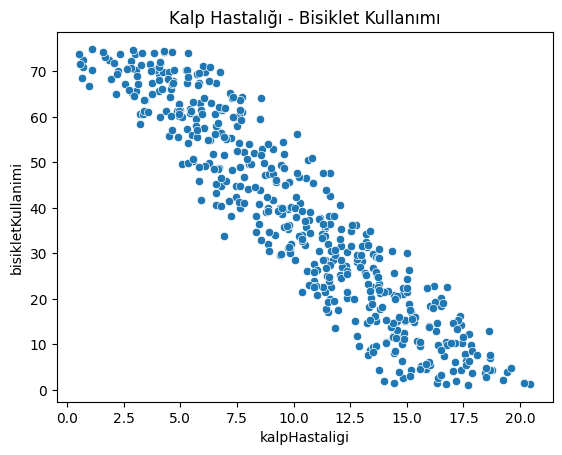

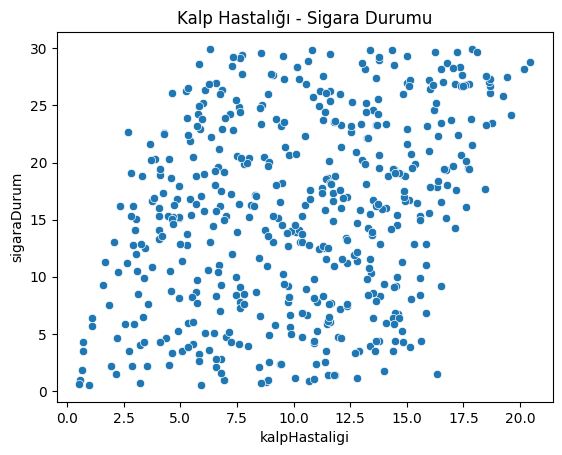

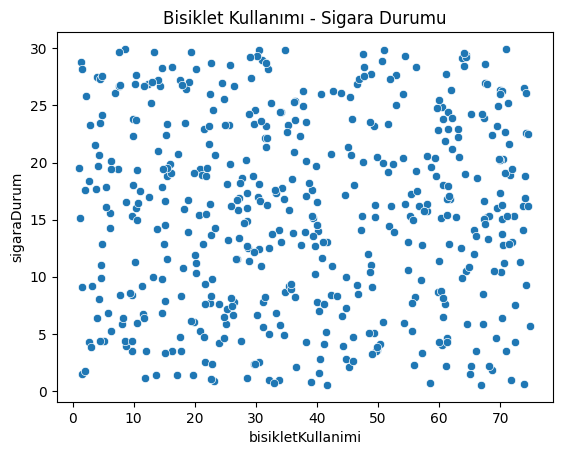

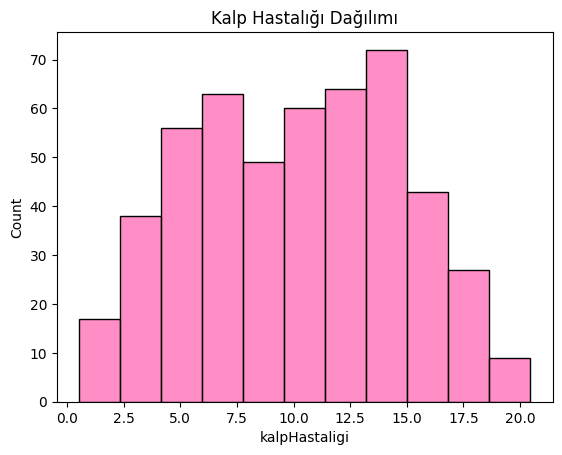

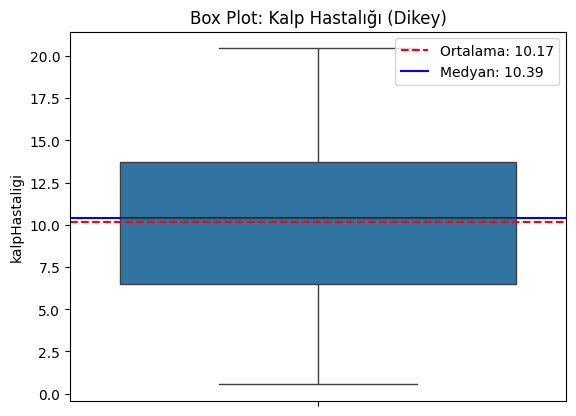

In [ ]:
# [1] Google Drive Bağlantısı ve Veri Seti Yükleme
from google.colab import drive
drive.mount('/content/drive')
dosya_yolu = '/content/drive/MyDrive/Colab Notebooks/heart.data.csv'
veriSeti = pd.read_csv(dosya_yolu)  # Tüm satırlarda aynı ismi kullanıyoruz

# [2] Veri Setinin İlk 6 Satırını Görüntüleme
print("Veri setinin ilk 6 satırı:")
display(veriSeti.head(6))

# [3] Veri Ön İşleme: İlgili Sütunları Seçme ve Yeniden Adlandırma
veriSeti = veriSeti.loc[:, ["biking", "smoking", "heart.disease"]]
veriSeti = veriSeti.rename(columns={
    "biking": "bisikletKullanimi",
    "smoking": "sigaraDurum",
    "heart.disease": "kalpHastaligi"
})
# [4] Temel İstatistiksel Bilgiler
print("Temel istatistiksel bilgiler:")
display(veriSeti.describe())

# [5] Görselleştirme
# [5.1] Scatter Plot: Kalp Hastalığı - Bisiklet Kullanımı
sns.scatterplot(x="kalpHastaligi", y="bisikletKullanimi", data=veriSeti)
plt.title("Kalp Hastalığı - Bisiklet Kullanımı")
plt.show()

# [5.2] Scatter Plot: Kalp Hastalığı - Sigara Durumu
sns.scatterplot(x="kalpHastaligi", y="sigaraDurum", data=veriSeti)
plt.title("Kalp Hastalığı - Sigara Durumu")
plt.show()

# [5.3] Scatter Plot: Bisiklet Kullanımı - Sigara Durumu
sns.scatterplot(x="bisikletKullanimi", y="sigaraDurum", data=veriSeti)
plt.title("Bisiklet Kullanımı - Sigara Durumu")
plt.show()

# [5.4] Histogram: Kalp Hastalığı Dağılımı
sns.histplot(data=veriSeti, x="kalpHastaligi", color="hotpink")
plt.title("Kalp Hastalığı Dağılımı")
plt.show()

# [5.5] Dikey Boxplot: Kalp Hastalığı
sns.boxplot(y="kalpHastaligi", data=veriSeti)
ortalama = veriSeti["kalpHastaligi"].mean()
medyan = veriSeti["kalpHastaligi"].median()

plt.axhline(ortalama, color='red', linestyle='--', label=f'Ortalama: {ortalama:.2f}')
plt.axhline(medyan, color='blue', linestyle='-', label=f'Medyan: {medyan:.2f}')

plt.title("Box Plot: Kalp Hastalığı (Dikey)")
plt.legend()
plt.show()


## 📊 Veri Setinin Genel Yapısı ve İlk Gözlemler

Bu bölümde, **kalp hastalığı (kalpHastaligi)**, **bisiklet kullanımı (bisikletKullanimi)** ve **sigara durumu (sigaraDurum)** değişkenlerinden oluşan veri setinin ilk 6 satırı ve temel istatistiksel özellikleri incelenmiştir. Analizler sonucunda aşağıdaki bulgular elde edilmiştir:

| Ölçüt            | Bisiklet Kullanımı (bisikletKullanimi) | Sigara Durumu (sigaraDurum) | Kalp Hastalığı (kalpHastaligi) |
|------------------|-----------------------------------------|-----------------------------|---------------------------------|
| Gözlem Sayısı    | 498                                     | 498                         | 498                             |
| Ortalama         | 37.79                                   | 15.44                       | 10.17                           |
| Standart Sapma   | 21.48                                   | 8.29                        | 4.57                            |
| Minimum          | 1.12                                    | 0.53                        | 0.55                            |
| 25. Yüzdelik     | 20.20                                   | 8.28                        | 6.51                            |
| Medyan           | 35.82                                   | 15.81                       | 10.39                           |
| 75. Yüzdelik     | 57.85                                   | 22.57                       | 13.72                           |
| Maksimum         | 74.91                                   | 29.95                       | 20.45                           |

1. **Merkezî Eğilim:** Ortalama ve medyan değerlerinin birbirine yakın oluşu, hem bisiklet kullanımı hem sigara durumu hem de kalp hastalığı değişkenlerinde görece dengeli bir dağılım olduğunu düşündürmektedir.

2. **Geniş Değer Aralıkları:** Bisiklet kullanımı 1.1–74.9, sigara kullanımı 0.5–29.9 ve kalp hastalığı 0.55–20.45 aralığında değişmektedir. Bu, bireyler arasında yaşam tarzı ve risk düzeyleri bakımından belirgin farklılıklar olduğunu göstermektedir.


---

## Scatter Plot: Değişkenler Arasındaki İlişkiler

Scatter plot, kalp hastalığı ile bisiklet kullanımı ve sigara durumu arasındaki ilişkileri görsel olarak analiz etmeye olanak tanır.

1. **KalpHastaligi & BisikletKullanimi:** Grafik incelendiğinde, noktaların genel eğiliminin **negatif** olduğu fark edilmektedir. Bisiklet kullanım düzeyi yükseldikçe kalp hastalığı oranının düştüğüne dair bir işaret söz konusudur.

2. **KalpHastaligi & SigaraDurum:** Bu dağılım grafiğinde ise **pozitif** bir yönlü ilişki mevcuttur. Sigara içme düzeyi arttıkça kalp hastalığı oranının da yükseldiğini düşünebiliriz.

3. **BisikletKullanimi & SigaraDurum:** İki bağımsız değişken arasındaki etkileşim, regresyon modeli açısından önemli olabilir (kollinearite). Grafik üzerinde gözle görülür bir korelasyon yoksa, modelde bu iki değişken birbirini gölgede bırakmadan anlamlı sonuçlar verebilir.

---

## Box Plot: Kalp Hastalığı Değerlerinin Aykırı Analizi

 Grafik, veri setindeki değerlerin yayılımını, ortalama ve medyan konumlarını kolayca yorumlamamıza yardımcı olur.

**Ortalama ve Medyan Konumu:**  
   - **Kırmızı kesikli çizgi:** Ortalama (10.17)  
   - **Mavi düz çizgi:** Medyan (10.39)  
   Bu iki değer birbirine oldukça yakın yerleşmiştir. Bu durum, verinin simetrik ve dengeli dağıldığını düşündürür.

Veri çarpık görünmemekte, dağılım oldukça düzenli ve dengeli ilerlemektedir. Bu yapı, çoklu doğrusal regresyon gibi istatistiksel modellere doğrudan uygulanabilir niteliktedir

---

## Histogram: Kalp Hastalığı Değerlerinin Dağılımı

Bu grafik, kalp hastalığı skorlarının veri setindeki bireyler arasında nasıl dağıldığını gösterir.

- **En çok değer**, 12–15 aralığında toplanmıştır → çoğu kişi **orta düzeyde risk** taşıyor.
- **Uç değerler** (0–2 ve 18–20) çok az → veri dengeli görünüyor.
- **Dağılım hafif sağa çarpık** → az sayıda yüksek riskli birey var.
- Bu yapı, **regresyon modeli için uygun** ve ek işlem gerektirmiyor.
---
---



## 3️⃣ Çoklu Doğrusal Regresyon Modelinin Kurulması ve Temel Değerlendirme

---

Bu bölümde, veri setindeki **bisiklet kullanımı** ve **sigara içme durumu** değişkenlerinin, **kalp hastalığı** üzerindeki etkileri **çoklu doğrusal regresyon modeli** ile analiz edilmiştir. Modelin kurulması, parametrelerin tahmin edilmesi ve sonuçların yorumlanması bu adımda gerçekleştirilmiştir.

---

### Regresyon Modeli

Çoklu doğrusal regresyon, birden fazla bağımsız değişkenin (X₁, X₂, ...) bir bağımlı değişken (Y) üzerindeki doğrusal etkilerini aynı anda analiz etmeye yarayan temel bir istatistiksel modeldir. Bu çalışmada:

- **Bağımlı değişken (Y):** Kalp hastalığı (*kalpHastaligi*)  
- **Bağımsız değişkenler:**  
  - **X₁:** Bisiklet kullanımı (*bisikletKullanimi*)  
  - **X₂:** Sigara içme durumu (*sigaraDurum*)

Modelin matematiksel ifadesi:

```
kalpHastaligi = β₀ + β₁ × bisikletKullanimi + β₂ × sigaraDurum + ε
```

Burada:

- **β₀ (sabit terim):** Diğer değişkenler sıfırken tahmin edilen kalp hastalığı değeri  
- **β₁:** Bisiklet kullanımının kalp hastalığı üzerindeki ortalama etkisi  
- **β₂:** Sigara kullanımının kalp hastalığı üzerindeki ortalama etkisi  
- **ε (hata):** Modelin açıklayamadığı rastlantısal sapmalar

---

### Regresyon Sonuçları

Aşağıdaki sonuçlar, modelin eğitim verisi ile oluşturulmuş **çoklu doğrusal regresyon çıktılarından** elde edilmiştir:

- **Regresyon denklemi:**  
```
kalpHastaligi = 14.935 − 0.200 × bisikletKullanimi + 0.181 × sigaraDurum
```

- **Sabit terim (β₀):** 14.935  
- **Bisiklet katsayısı (β₁):** −0.200  
- **Sigara katsayısı (β₂):** +0.181  
- **p-değeri (her iki değişken için):** 0.000 → İstatistiksel olarak anlamlı  
- **R² (determinasyon katsayısı):** 0.978 → model, kalp hastalığı değişkenindeki varyansın %97.8’ini açıklamaktadır

---

### Tahmin Örneği

Eğer bir bireyin:
- **Bisiklet kullanımı = 40**
- **Sigara durumu = 15**

ise, kalp hastalığı puanı şöyle tahmin edilir:
```
kalpHastaligi = 14.935 − 0.200 × 40 + 0.181 × 15 ≈ 11.62
```

Bu tahmin, kişinin yaşam tarzı değişkenleri üzerinden kalp hastalığı riskini yaklaşık olarak hesaplama imkânı sunar.

---

### Yorum

- **Bisiklet kullanımı ile kalp hastalığı arasında negatif bir ilişki** vardır. Bisiklet kullanımı arttıkça kalp hastalığı skoru azalmaktadır.  
- **Sigara kullanımı ile kalp hastalığı arasında pozitif bir ilişki** bulunmaktadır. Sigara içme düzeyi arttıkça kalp hastalığı riski de artmaktadır.  
- **Her iki değişkenin etkisi de istatistiksel olarak anlamlıdır** (p < 0.001) → bu da modelin güçlü ve güvenilir olduğunu gösterir.  
- **R² değeri oldukça yüksektir (0.978)** → Model, kalp hastalığı değişkenindeki varyansın neredeyse tamamını açıklamaktadır.  
- **Model çıktıları pratik uygulamalar için uygundur.** Yaşam tarzı verileriyle bireylerin sağlık riskleri önceden tahmin edilebilir.  


---
---
---


In [ ]:
import statsmodels.formula.api as smf             # statsmodels → istatistiksel modeller kurmak için kullanılan bir Python kütüphanesidir.
                                                  # OLS (Ordinary Least Squares – En Küçük Kareler) yöntemi ile doğrusal regresyon modeli kurulur.
                                                  # Amaç: Bağımlı ve bağımsız değişkenler arasında en iyi uyumu sağlayan doğrusal denklemi bulmaktır.
                                                  # Bu denklem, tahmin edilen değerlerle gerçek değerler arasındaki farkların kareleri toplamını minimize eder.

from scipy.stats import pearsonr                   # Pearson korelasyon katsayısını hesaplamak için kullanılır.
from matplotlib.cbook import boxplot_stats         # Kutu grafiğine (boxplot) dayalı aykırı değerleri bulmak için kullanılır.

# 3️⃣.1️⃣ Eksik ve Aykırı Değer Kontrolü
print("Eksik Veri Kontrolü:\n", veriSeti.isnull().sum())                            # Eksik verileri kontrol eder (her sütunda kaç tane NaN olduğunu gösterir)
print("Aykırı Değerler (kalpHastaligi):", boxplot_stats(veriSeti["kalpHastaligi"])) # "kalpHastaligi" sütunundaki aykırı değerleri kutu grafiği istatistikleriyle tespit eder

# 3️⃣.2️⃣ Korelasyon Analizi
r1, p1 = pearsonr(veriSeti.kalpHastaligi, veriSeti.bisikletKullanimi) # Kalp hastalığı - bisiklet kullanımı Pearson korelasyon katsayısı ve anlamlılık düzeyi
r2, p2 = pearsonr(veriSeti.kalpHastaligi, veriSeti.sigaraDurum)       # Kalp hastalığı - sigara kullanımı korelasyon katsayısı ve anlamlılık düzeyi
r3, p3 = pearsonr(veriSeti.bisikletKullanimi, veriSeti.sigaraDurum)   # Bisiklet kullanımı - sigara durumu korelasyon (bağımsız değişkenler arası ilişki)

print(f"KalpHastaligi ~ BisikletKullanimi: r={r1:.3f}, p={p1:.3f}")   # Korelasyon sonucunu yazdırır (kalp vs bisiklet)
print(f"KalpHastaligi ~ SigaraDurum: r={r2:.3f}, p={p2:.3f}")         # Korelasyon sonucunu yazdırır (kalp vs sigara)
print(f"BisikletKullanimi ~ SigaraDurum: r={r3:.3f}, p={p3:.3f}")     # Korelasyon sonucunu yazdırır (bisiklet vs sigara)

# 3️⃣.3️⃣ Eğitim ve Test Seti Ayrımı
egitim = veriSeti.sample(frac=0.7, random_state=1)  # Veri setinin %70'ini rastgele seçerek eğitim seti olarak ayırır
test = veriSeti.drop(egitim.index)                  # Geri kalan %30'luk kısmı test seti olarak ayırır

print("Eğitim seti boyutu:", egitim.shape)          # Eğitim setindeki satır ve sütun sayısını yazdırır
print("Test seti boyutu:", test.shape)              # Test setindeki satır ve sütun sayısını yazdırır

# 3️⃣.4️⃣ Çoklu Doğrusal Regresyon Modeli Kurulumu
model = smf.ols("kalpHastaligi ~ bisikletKullanimi + sigaraDurum", data=egitim).fit()  # OLS yöntemiyle çoklu doğrusal regresyon modelini kurar ve modeli eğitir
print(model.summary())                                                                 # Modelin özet istatistiklerini yazdırır (katsayılar, R², p-değerleri vs.)

print("\n Regresyon Denklemi:")
print(
    f"kalpHastaligi = {model.params['Intercept']:.3f} + "
    f"({model.params['bisikletKullanimi']:.3f}) * bisikletKullanimi + "
    f"({model.params['sigaraDurum']:.3f}) * sigaraDurum"
)                                                                                      # Tahmin edilen regresyon denklemindeki katsayıları yazdırır




Eksik Veri Kontrolü:
 bisikletKullanimi    0
sigaraDurum          0
kalpHastaligi        0
dtype: int64
Aykırı Değerler (kalpHastaligi): [{'mean': np.float64(10.17453806796976), 'iqr': np.float64(7.210341027356118), 'cilo': np.float64(9.87798278557187), 'cihi': np.float64(10.892526542427628), 'whishi': np.float64(20.453496225445), 'whislo': np.float64(0.551898154405674), 'fliers': array([], dtype=float64), 'q1': np.float64(6.513682578313207), 'med': np.float64(10.38525466399975), 'q3': np.float64(13.724023605669325)}]
KalpHastaligi ~ BisikletKullanimi: r=-0.935, p=0.000
KalpHastaligi ~ SigaraDurum: r=0.309, p=0.000
BisikletKullanimi ~ SigaraDurum: r=0.015, p=0.736
Eğitim seti boyutu: (349, 3)
Test seti boyutu: (149, 3)
                            OLS Regression Results                            
Dep. Variable:          kalpHastaligi   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squa

### 📊 Regresyon Modeli Çıktısının Yorumlanması

Model çıktısına göre, `bisikletKullanimi` ve `sigaraDurum` değişkenlerinin `kalpHastaligi` üzerindeki etkileri **istatistiksel olarak anlamlıdır**. Kurulan çoklu doğrusal regresyon modeli, yüksek düzeyde açıklayıcılığa sahiptir ve sağlık alanında kullanılabilecek güvenilir bir tahminleme imkânı sunmaktadır.

---

#### 🔹 Temel Regresyon Sonuçları

| Değişken           | Katsayı (β) | Std. Hata | t-değeri | p-değeri |  %95 Güven Aralığı   |
|--------------------|-------------|-----------|----------|----------|----------------------|
| Intercept          |  14.9346    |   0.094   | 158.300  |  0.000   |  14.749 - 15.120     |
| bisikletKullanimi  | -0.1997     |   0.002   | -119.859 |  0.000   |  -0.203 - -0.196     |
| sigaraDurum        |  0.1808     |   0.004   |  41.565  |  0.000   |   0.172 -  0.189     |

---

#### Yorumsal Analiz

- **Intercept (β₀ = 14.935):** Hem bisiklet kullanımı hem de sigara içme düzeyi sıfır olan bireylerde kalp hastalığı skoru yaklaşık 14.935’tir.
- **bisikletKullanimi (β₁ = -0.1997):** Bisiklet kullanımında her bir birimlik artış, kalp hastalığı değerini ortalama **0.1997 puan azaltmaktadır**.
- **sigaraDurum (β₂ = 0.1808):** Sigara içme düzeyinde her bir birimlik artış, kalp hastalığı değerini ortalama **0.1808 puan artırmaktadır**.
- **p-değerleri:** Tüm değişkenler için p < 0.05 olduğundan, **tüm katsayılar istatistiksel olarak anlamlıdır**.

---

####  Modelin Açıklayıcılığı

- **R² = 0.978** → Kalp hastalığı değişkenindeki varyansın %97.8’i model tarafından açıklanabilmektedir.
- **Adj. R² = 0.978** → Düzeltilmiş açıklayıcılık da çok yüksektir, bu da modelin overfitting yapmadığını gösterir.
- **F-istatistiği = 7670, p < 0.0001** → Modelin genel olarak anlamlı olduğunu göstermektedir.

---



### ✅ Sonuç

Bu modele göre:

- 🚲 **Bisiklet kullanımı**, kalp hastalığını azaltan koruyucu bir faktördür.
- 🚬 **Sigara kullanımı**, kalp hastalığını artıran ciddi bir risk faktörüdür.
- Model hem **istatistiksel olarak anlamlı**, hem de **yüksek açıklayıcılığa** sahip güvenilir bir yapıya sahiptir.

Bu sayede bireylerin yaşam tarzı özelliklerine bakılarak **kalp hastalığı riski bilimsel doğrulukla tahmin edilebilir**.

---

### Örnek Tahmin Hesaplama

Bir birey için:

- `bisikletKullanimi = 35`
- `sigaraDurum = 20`

ise, beklenen kalp hastalığı değeri aşağıdaki şekilde hesaplanır:

```
kalpHastaligi = 14.935 + (-0.1997 * 35) + (0.1808 * 20) ≈ 10.17
```

Bu sonuç, fiziksel aktivite düzeyinin artırılması ve sigara kullanımının azaltılmasının kalp sağlığı açısından ne denli önemli olduğunu sayısal olarak göstermektedir.





---


---



---



## 4️⃣ Modelin Performans Değerlendirmesi ve Hata Analizi

Bu bölümde, oluşturulan çoklu doğrusal regresyon modelinin **tahmin gücü**, test veri seti üzerinden değerlendirilmiştir.  
Amaç, modelin yalnızca eğitim verisine değil, **görmediği (yeni) verilere** karşı da ne derece başarılı tahminler üretebildiğini **nicel metrikler** ile ortaya koymaktır.

---

## Performans Değerlendirmenin Önemi

Eğitim verisinde elde edilen yüksek doğruluk, modelin genellenebilirliğini garanti etmez.  
Bu nedenle modelin performansı, bağımsız bir test veri seti üzerinde ölçülmelidir.  
Bu değerlendirme süreci şu şekilde gerçekleştirilmiştir:

- Model çıktıları, **gerçek gözlem değerleriyle karşılaştırılmıştır**  
- **Hata metrikleri** kullanılarak tahmin doğruluğu sayısallaştırılmıştır

---

## 📐 Kullanılan Temel Hata Metrikleri

| Metrik | Tanım | Yorumu |
|--------|-------|--------|
| **MAE** (Mean Absolute Error) | Gerçek ve tahmin değerleri arasındaki ortalama mutlak fark | Modelin tahminlerde ortalama ne kadar sapma gösterdiğini ifade eder |
| **MSE** (Mean Squared Error) | Hataların karelerinin ortalaması | Büyük hatalara daha fazla ağırlık vererek cezalandırır |
| **RMSE** (Root Mean Squared Error) | MSE'nin karekökü | Ortalama hata düzeyini orijinal ölçüm birimiyle ifade eder (örn. kalp puanı) |

> **Not:** Düşük MAE değeri modelin genel doğruluğunu, düşük RMSE ise özellikle büyük hatalardan kaçındığını gösterir.

---

## Uygulanan Adımlar

- ✅ Test verisi üzerinden model tahminleri elde edilmiştir  
- ✅ İlk beş tahmin, gözlemsel (gerçek) veriler ile karşılaştırılmıştır  
- ✅ MAE, MSE ve RMSE metrikleri hesaplanarak performans değerlendirilmiştir  
- ✅ Elde edilen hata değerleri hem sayısal hem de yoruma dayalı olarak raporlanmıştır

---

Modelin bu metrikler çerçevesinde gösterdiği düşük hata değerleri, modelin hem **istatistiksel** hem de **uygulamaya yönelik** geçerliliğini desteklemektedir. Kalp hastalığı gibi klinik önem taşıyan konularda, bu düzeydeki performans **güvenilir tahminlemeler** için umut verici bir göstergedir.


In [ ]:
# 4️⃣ Modelin Performans Değerlendirmesi ve Hata Analizi

# 4️⃣.1️⃣ Test setinden tek bir örnek için tahmin (manuel hesaplama)
# Formül: kalpHastaligi = 14.935 + (-0.1997 × bisiklet) + (0.1808 × sigara)
kalp_test1 = 14.935 + (-0.1997 * 40) + (0.1808 * 15)
print("🔹 Tek test örneği için tahmin edilen kalp hastalığı:", round(kalp_test1, 2))


# 4️⃣.2️⃣ Test setindeki tüm veriler için tahminler
tahminler = model.predict(test[["bisikletKullanimi", "sigaraDurum"]])
print("\n İlk 5 Tahmin ve Gerçek Değer Karşılaştırması:")
for t, y in zip(tahminler.head(), test.kalpHastaligi.head()):
    print(f"  Tahmin: {t:.4f}   |   Gerçek: {y:.4f}")

# 4️⃣.3️⃣ Gerçek ve tahmin değerlerini tek tabloya al
performansVerisi = pd.DataFrame({
    "Gerçek": test.kalpHastaligi,
    "Tahmin": tahminler
})

# 4️⃣.4️⃣ Sklearn ile hata metriklerini hesapla
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test.kalpHastaligi, tahminler)
mse = mean_squared_error(test.kalpHastaligi, tahminler)
rmse = np.sqrt(mse)

# 4️⃣.5️⃣ Hata metriklerini yazdır
print("\n Sklearn ile Hesaplanan Hatalar:")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")

# Ortalama değeri al
ortalama = test.kalpHastaligi.mean()

# Yüzde hesaplamaları
mae_yuzde = 100 * mae / ortalama
mse_yuzde = 100 * mse / ortalama
rmse_yuzde = 100 * rmse / ortalama

# Yüzdelik hata çıktıları
print(f"%MAE  : %{mae_yuzde:.2f}")
print(f"%MSE  : %{mse_yuzde:.2f}")
print(f"%RMSE : %{rmse_yuzde:.2f}")

🔹 Tek test örneği için tahmin edilen kalp hastalığı: 9.66

 İlk 5 Tahmin ve Gerçek Değer Karşılaştırması:
  Tahmin: 2.3288   |   Gerçek: 2.8541
  Tahmin: 17.7238   |   Gerçek: 17.1778
  Tahmin: 6.4942   |   Gerçek: 6.8166
  Tahmin: 16.3001   |   Gerçek: 15.8547
  Tahmin: 7.1947   |   Gerçek: 6.4302

 Sklearn ile Hesaplanan Hatalar:
MAE  : 0.5112
MSE  : 0.4212
RMSE : 0.6490
%MAE  : %5.47
%MSE  : %4.51
%RMSE : %6.95




Bu bölümde, modelimizin **bisiklet kullanımı** ve **sigara içme durumu** değişkenlerine dayanarak **kalp hastalığı tahmini** ne kadar başarılı yaptığını değerlendiriyoruz.  
İlk olarak birkaç örnek tahmine, ardından genel hata ölçümlerine göz atacağız.

---

### Örnek Tahminler (İlk 5 Satır)

| Gözlem | Tahmin | Gerçek | Fark (Tahmin – Gerçek) |
|--------|--------|--------|-------------------------|
|   1    |  2.33  |  2.85  |      –0.52              |
|   2    | 17.72  | 17.18  |      +0.54              |
|   3    |  6.49  |  6.82  |      –0.33              |
|   4    | 16.30  | 15.85  |      +0.45              |
|   5    |  7.19  |  6.43  |      +0.76              |

> Tahmin edilen değerler genellikle gerçek değerlere oldukça yakındır. Büyük hatalar gözlemlenmemiştir.

---

### Hata Metrikleri Açıklamaları

| Metrik | Anlamı |
|--------|--------|
| **MAE**  | Ortalama ne kadar sapma yaptık? (± hatalar) |
| **MSE**  | Büyük hataları daha fazla cezalandırır |
| **RMSE** | Ortalama hatanın gerçek birimle (kalp puanı) ifadesi |

---

### 🔢 Sonuçlar

| Metrik | Değer | Açıklama |
|--------|--------|-----------|
| **MAE**  | 0.51   | Ortalama yarım puanlık sapma ile tahmin yapıyor |
| **MSE**  | 0.42   | Büyük hatalar oldukça düşük |
| **RMSE** | 0.65   | Kalp hastalığı gibi sürekli bir değişken için oldukça makul |

---

> Model, hem istatistiksel hem de pratik anlamda güvenilir tahminler üretmektedir. Kalp hastalığı gibi hassas konularda, bu düzeyde düşük hata değerleri umut vericidir.


## 5️⃣ Regresyon Doğrusu: Gerçek ve Tahmin Edilen Değerlerin Görselleştirilmesi

Bu bölümde, çoklu doğrusal regresyon modelinin test veri seti üzerindeki performansı, sayısal değerlendirmelere ek olarak **görsel analiz yoluyla da incelenmektedir**.  
Modelin tahmin ettiği değerler ile gerçek gözlem değerleri aynı grafik üzerinde gösterilerek, modelin veriyle ne ölçüde örtüştüğü daha açık şekilde ortaya konur.

---

### Görselleştirmenin Amacı ve Önemi

Regresyon modellerinin değerlendirilmesinde yalnızca istatistiksel hata metriklerine başvurmak yeterli olmayabilir.  
**Grafiksel karşılaştırmalar**, modelin başarısını sezgisel ve bütüncül bir bakış açısıyla analiz etme imkânı sunar. Bu tür görselleştirmeler sayesinde:

- Modelin tahmin ettiği değerler ile gerçek değerler arasındaki farklar **doğrudan ve anlaşılır biçimde gözlemlenebilir**.  
- Modelin veri üzerindeki genel uyumu ve eğilimi, **regresyon doğrusunun yatay eksen boyunca nasıl seyrettiği** ile değerlendirilebilir.  
- **Sistematik sapmalar** ya da belirli değer aralıklarında oluşan hata yoğunluğu görsel olarak tespit edilebilir.

---

### Uygulama Açısından Katkısı

Bu yaklaşım, modelin pratik geçerliliğini ve güvenilirliğini destekleyici bir unsur olarak değerlendirilir.  
Sayısal sonuçlar kadar, **modelin genel davranışını yansıtan grafikler**, model değerlendirme sürecinin ayrılmaz bir parçası olarak kabul edilmektedir.

---




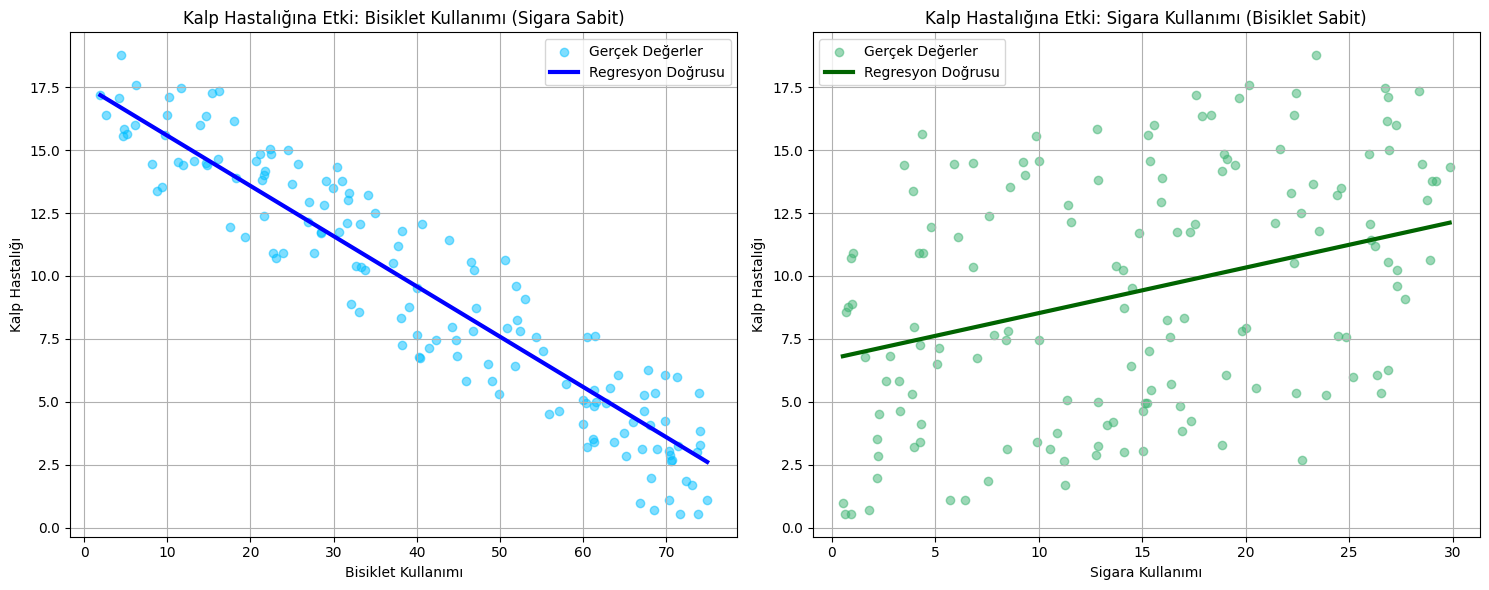

In [ ]:
# 1. Sabit değişkenlerin ortalama değerlerini alalım
sabit_sigara = test["sigaraDurum"].mean()                # Sigara değişkeninin ortalama değeri
sabit_bisiklet = test["bisikletKullanimi"].mean()        # Bisiklet değişkeninin ortalama değeri

# 2. Bağımsız değişken eksen değerlerini oluşturalım
x_bisiklet = np.linspace(test["bisikletKullanimi"].min(), test["bisikletKullanimi"].max(), 100)  # Bisiklet için 100 noktalık eksen
x_sigara = np.linspace(test["sigaraDurum"].min(), test["sigaraDurum"].max(), 100)                # Sigara için 100 noktalık eksen
# 3. Tahmin değerlerini üretelim
y_bisiklet = model.predict(pd.DataFrame({                # Sigara sabitken bisiklet değişince tahmin edilen kalp hastalığı
    "bisikletKullanimi": x_bisiklet,
    "sigaraDurum": sabit_sigara
}))
y_sigara = model.predict(pd.DataFrame({                  # Bisiklet sabitken sigara değişince tahmin edilen kalp hastalığı
    "bisikletKullanimi": sabit_bisiklet,
    "sigaraDurum": x_sigara
}))
# 4. Grafikler
plt.figure(figsize=(15, 6))                              # Grafik penceresinin boyutu ayarlanıyor

# 🚲 Bisiklet Kullanımı Grafiği
plt.subplot(1, 2, 1)                                     # 1. alt grafik (1 satır, 2 sütun, 1. grafik)
plt.scatter(test["bisikletKullanimi"], test["kalpHastaligi"], color="deepskyblue", alpha=0.5, label="Gerçek Değerler")  # Gerçek değerler
plt.plot(x_bisiklet, y_bisiklet, color="blue", linewidth=3, label="Regresyon Doğrusu")                                  # Regresyon çizgisi
plt.title("Kalp Hastalığına Etki: Bisiklet Kullanımı (Sigara Sabit)")                                                  # Başlık
plt.xlabel("Bisiklet Kullanımı")                           # X ekseni etiketi
plt.ylabel("Kalp Hastalığı")                               # Y ekseni etiketi
plt.legend()                                               # Etiket kutusu göster
plt.grid(True)                                             # Izgara çizgilerini aç

# 🚬 Sigara Kullanımı Grafiği
plt.subplot(1, 2, 2)                                     # 2. alt grafik
plt.scatter(test["sigaraDurum"], test["kalpHastaligi"], color="mediumseagreen", alpha=0.5, label="Gerçek Değerler")  # Gerçek değerler
plt.plot(x_sigara, y_sigara, color="darkgreen", linewidth=3, label="Regresyon Doğrusu")                              # Regresyon çizgisi
plt.title("Kalp Hastalığına Etki: Sigara Kullanımı (Bisiklet Sabit)")                                                # Başlık
plt.xlabel("Sigara Kullanımı")                             # X ekseni etiketi
plt.ylabel("Kalp Hastalığı")                               # Y ekseni etiketi
plt.legend()                                               # Etiket kutusu göster
plt.grid(True)                                             # Izgara çizgilerini aç

plt.tight_layout()                                        # Alt grafiklerin birbirine çakışmaması için boşluk ayarla
plt.show()                                                # Grafik gösterimi


"## Grafik Analizi ve Yorumlama

Aşağıda yer alan iki ayrı grafik, **çoklu doğrusal regresyon modelinin** bağımsız değişkenler bazında nasıl çalıştığını görsel olarak sunmaktadır. Her grafik, ilgili değişkenin **kalp hastalığı üzerindeki etkisini** gösterirken diğer değişken **sabit tutulmuştur**.

---

### 1️⃣ Kalp Hastalığına Etki: Bisiklet Kullanımı (Sigara Sabit)

- 🔵 **Mavi Noktalar:** Gerçek test verisindeki kalp hastalığı gözlemlerini temsil eder.
- 🔷 **Mavi Regresyon Çizgisi:** Modelin, bisiklet kullanımı arttıkça kalp hastalığı değerlerinde nasıl bir değişim öngördüğünü gösterir. Sigara değişkeni sabit tutulmuştur.

#### Yorum:
- Bisiklet kullanımı arttıkça kalp hastalığı riskinin azaldığı net bir şekilde görülmektedir.  
- Noktalar doğrusal çizgiye oldukça yakın dağılmıştır, bu da modelin bisiklet değişkenini iyi açıkladığını gösterir.  
- Bu durum, fiziksel aktivitenin kalp sağlığı üzerindeki **koruyucu etkisini** desteklemektedir.

---

### 2️⃣ Kalp Hastalığına Etki: Sigara Kullanımı (Bisiklet Sabit)

- 🟢 **Yeşil Noktalar:** Gerçek test verisindeki kalp hastalığı gözlemlerini temsil eder.
- 🟩 **Yeşil Regresyon Çizgisi:** Modelin, sigara kullanımı arttıkça kalp hastalığında nasıl bir değişim beklediğini gösterir. Bisiklet kullanımı sabit tutulmuştur.

#### Yorum:
- Sigara kullanımı arttıkça kalp hastalığı değerlerinde **yukarı yönlü bir eğilim** mevcuttur.  
- Ancak veriler daha dağınık göründüğünden, bu değişkenin açıklayıcılığı bisiklet kullanımına göre daha zayıf kalmaktadır.  
- Yine de pozitif eğim, sigaranın kalp hastalığına olan **olumsuz etkisini** destekler niteliktedir.

---

### ✅ Genel Sonuç

- 🚲 Bisiklet kullanımı değişkeni, kalp hastalığını azaltmada **daha güçlü bir açıklayıcıdır**.  
- 🚬 Sigara kullanımı ise daha zayıf ama yine de istatistiksel olarak **anlamlı bir risk faktörü** olarak karşımıza çıkmaktadır.  
- Görseller, çoklu regresyon modelinin nasıl çalıştığını **değişken bazında ayrıştırarak sezgisel olarak anlatmak için güçlü bir araçtır**.
